# Visualizing Word Vectors with t-SNE

TSNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional (100 dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words. 

### Steps

1. Clean the data
2. Build a corpus
3. Train a Word2Vec Model
4. Visualize t-SNE representations of the most common words 

Credit: Some of the code was inspired by this awesome [NLP repo][1]. 




  [1]: https://github.com/rouseguy/DeepLearningNLP_Py

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec
from gensim.test.utils import common_texts

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
file_name = 'input.txt'
data = []
for row in open(file_name, 'r'):
    data.append(row)

In [5]:
len(data)

3336

In [7]:
#nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ahmad/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence



In [40]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []

    for sentence in data:
        word_list = sentence.split(" ")
        corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:10]

[["ALICE'S", 'ADVENTURES', 'IN', 'WONDERLAND\n'],
 ['\n'],
 ['Lewis', 'Carroll\n'],
 ['\n'],
 ['THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', '3.0\n'],
 ['\n'],
 ['CHAPTER', 'I.', 'Down', 'the', 'Rabbit-Hole\n'],
 ['\n'],
 ['Alice',
  'was',
  'beginning',
  'to',
  'get',
  'very',
  'tired',
  'of',
  'sitting',
  'by',
  'her',
  'sister',
  'on',
  'the\n'],
 ['bank,',
  'and',
  'of',
  'having',
  'nothing',
  'to',
  'do:',
  'once',
  'or',
  'twice',
  'she',
  'had',
  'peeped',
  'into',
  'the\n']]

In [41]:
len(corpus)

3336

# Word 2 Vec

The Word to Vec model produces a vocabulary, with each word being represented by an n-dimensional numpy array (100 values in this example)

In [49]:
#size=4, window=3, min_count=10
model = word2vec.Word2Vec(corpus, size=4, window=3, min_count=10, workers=4)
model.wv.vocab

{'\n': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3cc978>,
 'CHAPTER': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3ccb70>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3ccb00>,
 'Alice': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3ccac8>,
 'was': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3cc9b0>,
 'beginning': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3ccba8>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3cce48>,
 'get': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3cce80>,
 'very': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3cceb8>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3ccef0>,
 'by': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3ccf28>,
 'her': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3ccf60>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3ccfd0>,
 'the\n': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3ccf98>,
 'and': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3cc9e8>,
 'nothing': <gensim.models.keyedvectors.Vocab at 0x7f4e8d3cc

In [16]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


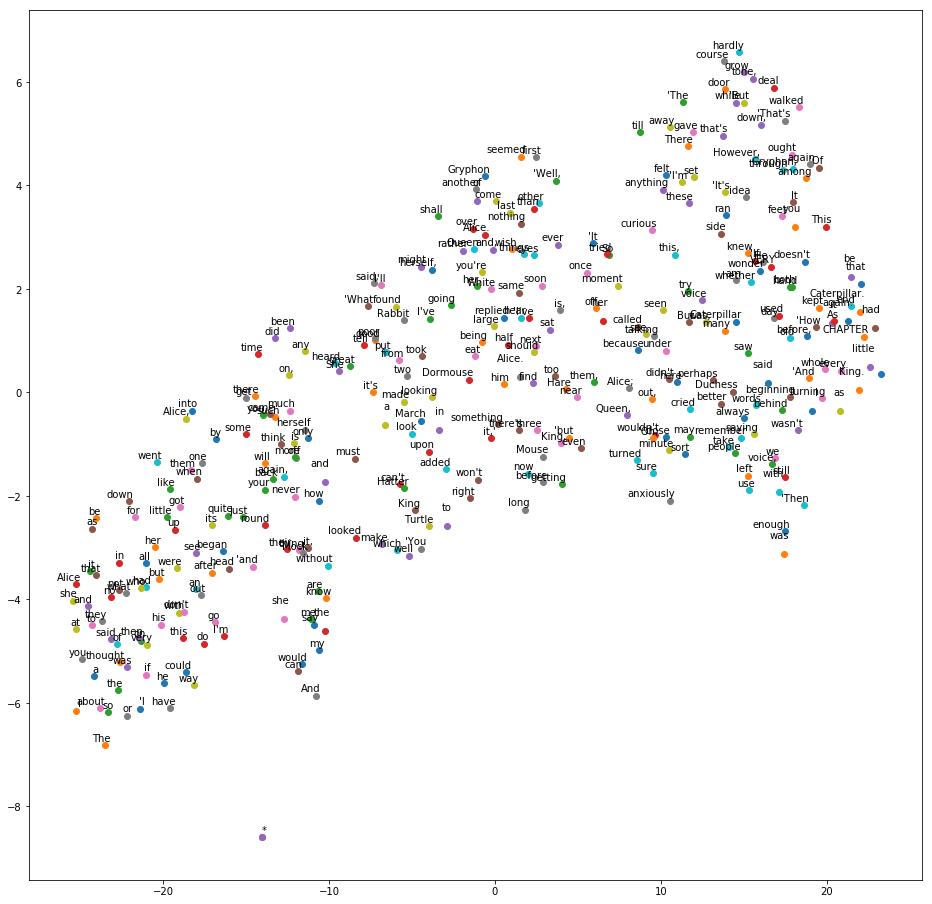

In [50]:
tsne_plot(model)

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


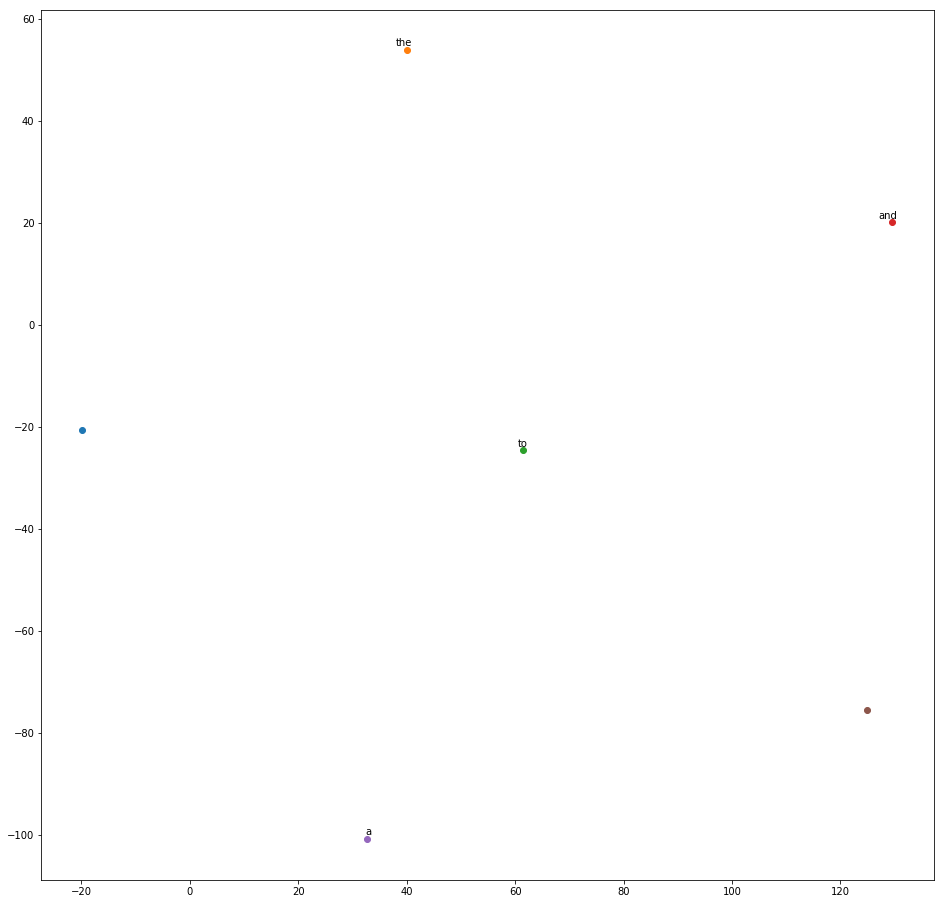

In [18]:
# A more selective model
#model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
#tsne_plot(model)

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


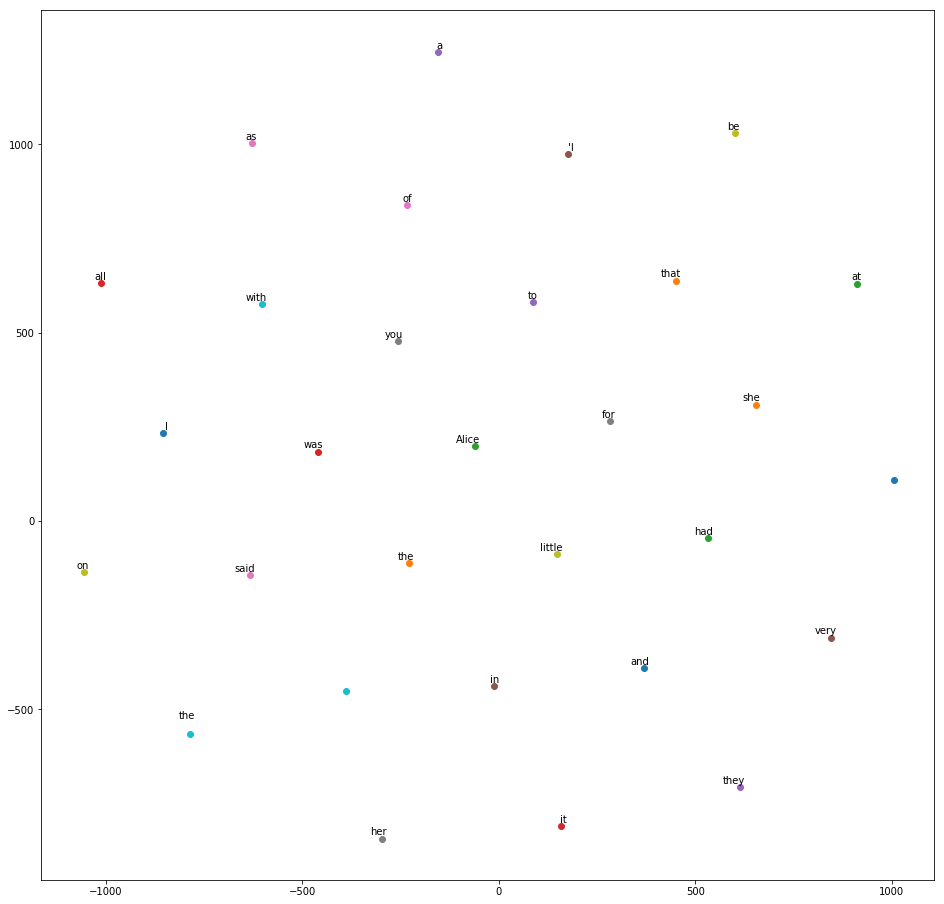

In [20]:
# A less selective model
#model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=100, workers=4)
#tsne_plot(model)

# It's Becoming Hard to Read

With a dataset this large, its difficult to make an easy-to-read TSNE visualization. What you can do is use the model to look up the most similar words from any given point. 

In [51]:
model.most_similar('Alice')

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/home/ahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[("'What", 0.9998517632484436),
 ('she', 0.9996687173843384),
 ('seemed', 0.999614953994751),
 ("'Well,", 0.999578595161438),
 ('any', 0.9994529485702515),
 ('Alice;', 0.9992871284484863),
 ("I've", 0.9992727041244507),
 ('found', 0.9992638826370239),
 ('saw', 0.9992011785507202),
 ('first', 0.9990280866622925)]

In [56]:
model.most_similar('Queen')

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/home/ahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[("it,'", 0.9998559951782227),
 ('know', 0.9996418952941895),
 ('voice', 0.9996172785758972),
 ('with', 0.9995594620704651),
 ('this', 0.9995538592338562),
 ('anything', 0.999462366104126),
 ('began', 0.999306321144104),
 ('if', 0.9991381764411926),
 ('his', 0.9991172552108765),
 ('are', 0.9990544319152832)]

In [55]:
model.similarity('Queen', 'King')

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/home/ahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.99801886

In [35]:
from gensim.test.utils import common_texts, get_tmpfile

In [34]:
common_texts

[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [37]:
path = get_tmpfile("word2vec.model")

In [39]:
model = word2vec.Word2Vec(common_texts, size=100, window=5, min_count=1, workers=4)

# FastText

In [42]:
from gensim.models import FastText

In [58]:
model = FastText(corpus, size=4, window=3, min_count=10, iter=10)

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


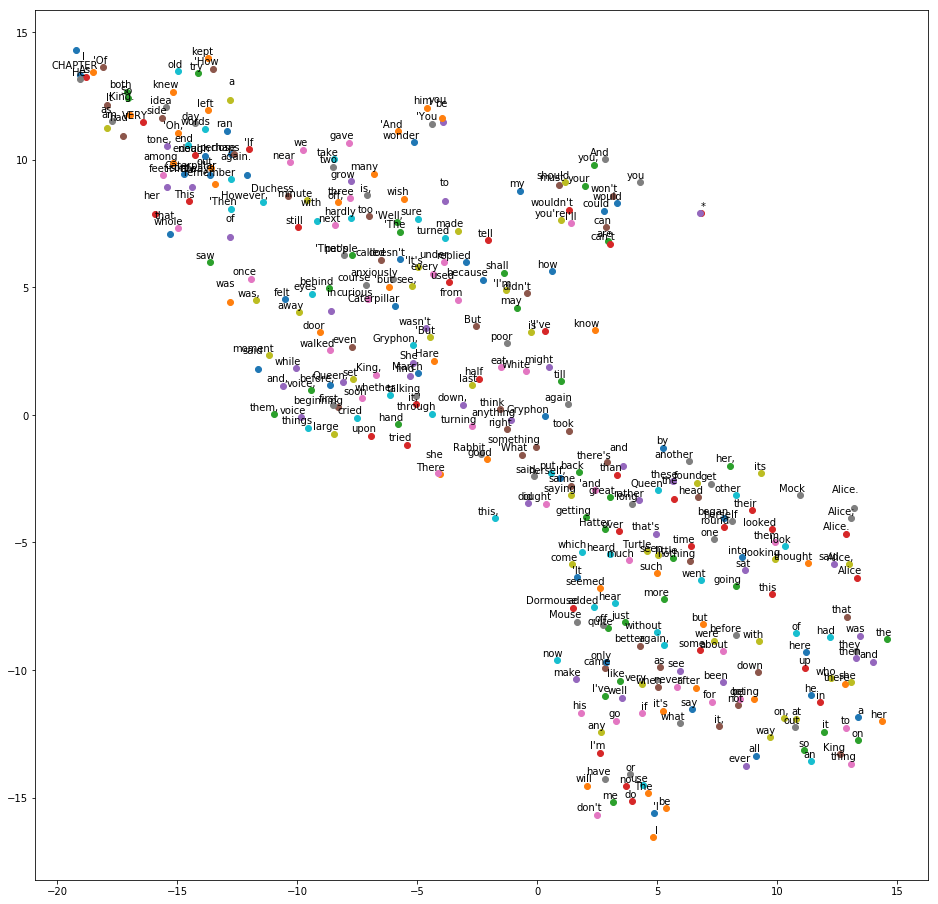

In [44]:
tsne_plot(model)

In [59]:
model.most_similar('Queen')

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/home/ahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('being', 0.9999017715454102),
 ('had', 0.9998573660850525),
 ('sat', 0.9997713565826416),
 ('on,', 0.9997438788414001),
 ('time', 0.9997268915176392),
 ('nothing', 0.9997174143791199),
 ('voice,', 0.9995853900909424),
 ('down', 0.9995762705802917),
 ('soon', 0.9995473623275757),
 ('one', 0.9995184540748596)]

In [60]:
model.similarity('Queen', 'King')

/home/ahmad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/home/ahmad/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.99894667

# The End

Good luck!